In [6]:
import os
import random
import time
import glob
import json
import dit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

os.getcwd()

'C:\\Users\\enrik\\Desktop\\Mabomba\\Studie\\MasterCS\\Thesis\\code\\plot_notebooks'

In [9]:
states = 2
dist_type = 'random'
name = dist_type +'states'+str(states)

os.chdir('../../')
os.chdir('./results/'+'comparison')
allfiles = glob.glob("*.pkl")
files = [file for file in allfiles if name in file]
d = pd.concat([pd.read_pickle(f) for f in files])
os.chdir('../../code/plot_notebooks')


0.022222222222222223

In [8]:
# d=d[d['exp_sort']=='syndisc']
# d.sort_values(by=['WMS(X)/Hmax(X)'],ascending=False)
# for i in d['pXS']:
#     a = i
#     print(type(a))

print(d.keys(),len(d))
d.head()

Index(['exp_sort', 'tot_repeats', 'systemID', 'syn_upper', 'lenS', 'srv_data',
       'parXY', 'I(X1;X2)', 'runID', 'tot_runtime', 'syn_info', 'lenX', 'lenY',
       'states', 'dist_type', 'num_srvs', 'systems', 'prev', 'exp', 'save',
       'folder', 'rowfolder', 'mm', 'summed_modulo', 'tol', 'H(S)', 'I(X;S)',
       'I(Xi;S)', 'pXS', 'WMS(X)/Hmax(X)', 'statesS', 'H(Sfound|min_perm)',
       'I(X;min_perm)', 'sum(I(Xi;min_perm))'],
      dtype='object') 129


,exp_sort,tot_repeats,systemID,syn_upper,lenS,srv_data,parXY,I(X1;X2),runID,tot_runtime,...,tol,H(S),I(X;S),I(Xi;S),pXS,WMS(X)/Hmax(X),statesS,H(Sfound|min_perm),I(X;min_perm),sum(I(Xi;min_perm))
0,syndisc,0.0,0,0.634624,1,"[0.8606769425651037, 0.22448411252763378, [-2....","[0.21212555953996812, 0.2838748130123791, 0.74...",0.110903,0,0.016605,...,0.0,0.860677,0.224484,"[-2.220446049250313e-16, 0.0]","[[[0.06021710354947429, 0.0], [0.0, 0.15190845...",0.353728,2,0.849838,0.823368,0.189425
1,syndisc,0.0,1,0.325718,1,"[0.7894263982418395, 0.14473846144559221, [4.4...","[0.852635828401474, 0.9635622721199553, 0.3199...",0.235227,0,0.016919,...,0.0,0.789426,0.144738,"[4.440892098500626e-16, 0.0]","[[[0.6508587641283216, 0.1707089519770868], [0...",0.444368,2,0.869335,0.395869,0.098042
2,syndisc,0.0,2,0.363761,1,"[0.4847075212022025, 0.043565657929717894, [2....","[0.45818583952034525, 0.16672402211131448, 0.0...",0.057010,0,0.011928,...,0.0,0.484708,0.043566,"[2.220446049250313e-16, 0.0]","[[[0.07639058603928797, 0.0], [0.3336768797934...",0.119765,2,0.983316,0.965288,0.628875
3,syndisc,0.0,3,0.836737,1,"[0.6835954335391556, 0.34045526969209794, [0.0...","[0.42622137302874763, 0.8468932951040307, 0.48...",0.105379,0,0.009970,...,0.0,0.683595,0.340455,"[0.0, 0.0]","[[[0.34881355369198414, 0.01215046935608195], ...",0.406884,2,0.632186,0.929500,0.143404
4,syndisc,0.0,4,0.671834,1,"[0.5115455375934521, 0.11497114374224338, [-4....","[0.19214089156683156, 0.8861077937028871, 0.64...",0.034094,0,0.013963,...,0.0,0.511546,0.114971,"[-4.440892098500626e-16, -2.220446049250313e-16]","[[[0.17025754150641242, 0.0], [0.0, 0.02188335...",0.171130,2,0.902799,0.993707,0.462406


## Find interesting relations

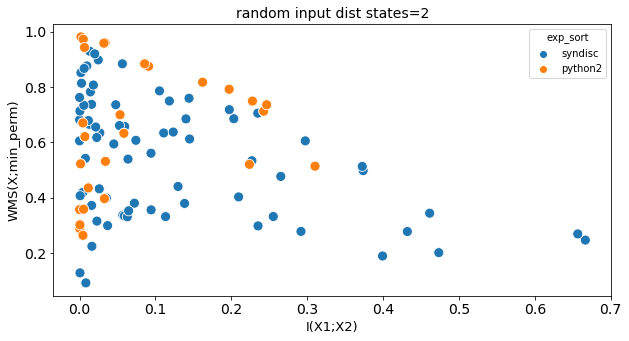

In [4]:
fig, ax = plt.subplots(figsize=(10,5))        
xcol = 'I(X1;X2)'
ycol = 'WMS(X;min_perm)'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='exp_sort',
                sizes=(10,60),palette='tab10',s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()

## Find interesting found srvs

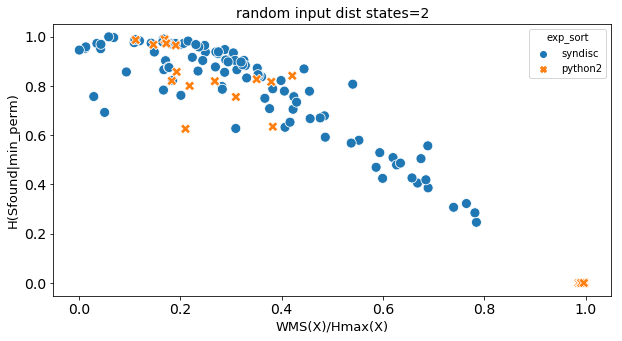

In [5]:
fig, ax = plt.subplots(figsize=(10,5))        
xcol = 'WMS(X)/Hmax(X)'
ycol = 'H(Sfound|min_perm)'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='exp_sort',style='exp_sort',
                sizes=(10,60),palette='tab10',s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()